# Plot Data cdg dynamics Pseudomonas aeruginosa

---

## Import packages

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc("figure", figsize=(7,9))

import seaborn as sns
import pathlib

plt.rcParams.update({'font.size': 9})

---

## Load Data
We load the data from the last notebook;

In [16]:
proj_dir = pathlib.Path(pathlib.Path.home(), 'switchdrive', 'Biozentrum', 'Andreas')
processed_dir = proj_dir / 'processed'

#load data frame
df_name = processed_dir / 'pseudomonas_combined_filtered_paired_data_40min.csv'
df = pd.read_csv(df_name, index_col=0)
df.reset_index(drop=True)

#add time in minutes
df['time since birth [min]'] = df['age'] * 5
df['cdg ratio'] = df['rel_cdg_hl']
df.head()

,uni_par_id,strain,movie_name,replicate,id_colony,id_par,frames,generation,age,cdg_dh,cdg_dl,cdg_norm_dh,cdg_norm_dl,len_dh,len_dl,idc_dh,idc_dl,rel_cdg_hl,time since birth [min],cdg ratio
0,UJP1964-0-11,UJP1964,UJP1964_TL_PseudoMutants_D11optScar_01_06,0,1,11,94,6.0,0,564.126543,511.681208,1.000000,0.907033,34.391411,32.199379,347,12,0.907033,0,0.907033
1,UJP1964-0-11,UJP1964,UJP1964_TL_PseudoMutants_D11optScar_01_06,0,1,11,95,6.0,1,559.313218,503.627692,0.991468,0.892757,35.792274,34.910725,347,12,0.900439,5,0.900439
2,UJP1964-0-11,UJP1964,UJP1964_TL_PseudoMutants_D11optScar_01_06,0,1,11,96,6.0,2,576.138810,515.492958,1.021294,0.913790,36.618362,38.438934,347,12,0.894737,10,0.894737
3,UJP1964-0-11,UJP1964,UJP1964_TL_PseudoMutants_D11optScar_01_06,0,1,11,97,6.0,3,602.773743,533.726790,1.068508,0.946112,38.258133,40.846161,347,12,0.885451,15,0.885451
4,UJP1964-0-11,UJP1964,UJP1964_TL_PseudoMutants_D11optScar_01_06,0,1,11,98,6.0,4,592.822785,530.648579,1.050868,0.940655,41.325165,41.204372,347,12,0.895122,20,0.895122


---

## Bar plot of relative CDG levels 

/Users/simonvanvliet/opt/miniconda3/envs/i2i_env/lib/python3.9/site-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


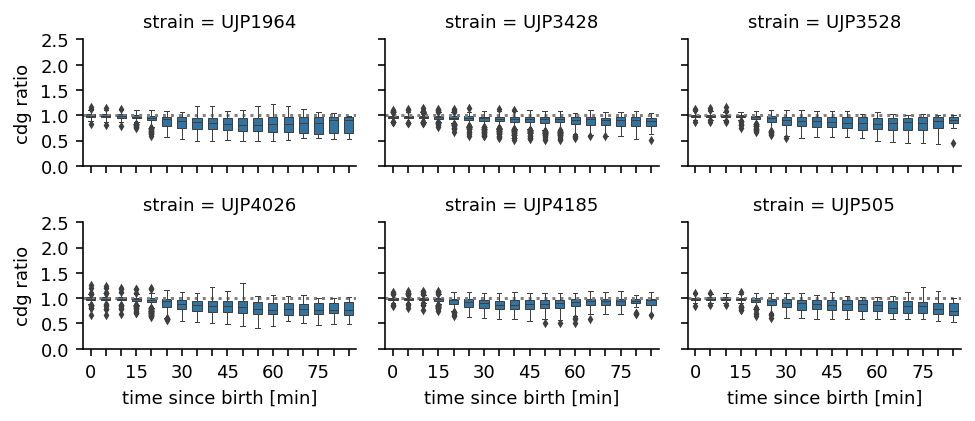

In [13]:
# Initialize a grid of plots with an Axes for each walk
g = sns.FacetGrid(data=df[df['age']<18], col="strain", col_wrap=3, height=1.5, aspect=1.5,ylim=(0,2.5),palette="colorblind")
# Draw a horizontal line to show the starting point
g.refline(y=1, linestyle=":")
# Draw a line plot to show the trajectory of each random walk
flierprops = dict(markersize=2, linestyle='none')

g.map(sns.boxplot, "time since birth [min]", "cdg ratio", flierprops=flierprops, width=0.6, linewidth=0.5)
# Adjust the arrangement of the plots
g.fig.tight_layout(w_pad=1)

g.set(yticks=[0, 0.5, 1 , 1.5, 2, 2.5])

for ax in g.axes.flat:
    labels = ax.get_xticklabels() # get x labels        
    for label in ax.get_xticklabels():    
        if int(label.get_text()) % 15 == 0:  
            label.set_visible(True)
        else:
            label.set_visible(False)
            
            
im_name = processed_dir / 'boxplot_cdg_ratio_Pa.svg'
g.savefig(im_name)

---

## Line plot of absolute CDG levels 

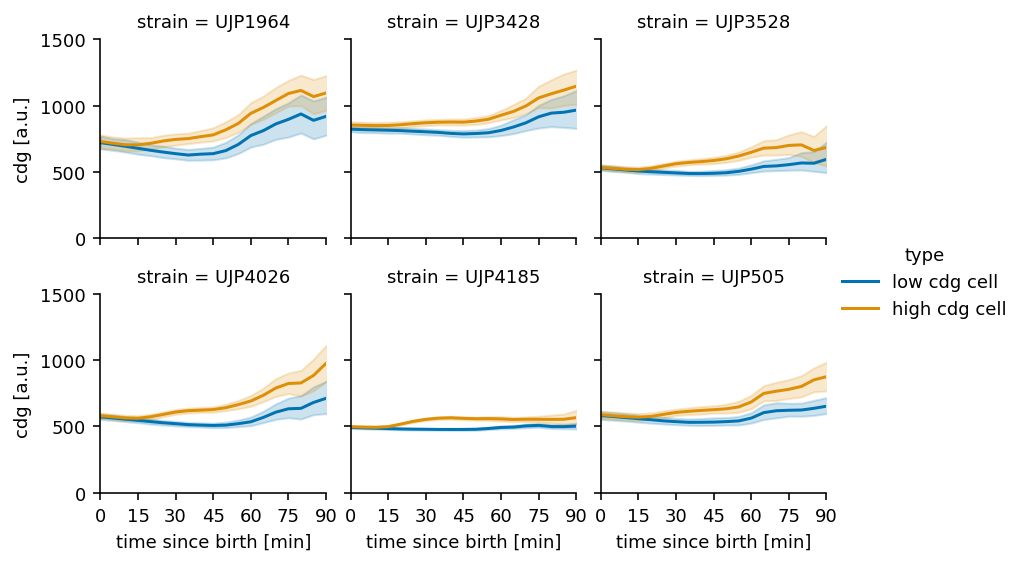

In [14]:
df1 = df[['strain','time since birth [min]','cdg_dh']].copy()
df1['type'] = 'high cdg cell'
df1['cdg [a.u.]'] = df1['cdg_dh']

df2 = df[['strain','time since birth [min]','cdg_dl']].copy()
df2['type'] = 'low cdg cell'
df2['cdg [a.u.]'] = df2['cdg_dl']

df_hvl = pd.concat((df1, df2),keys=['strain','time since birth [min]','cdg','type']).reset_index()

g = sns.FacetGrid(data=df_hvl, col="strain", hue='type', col_wrap=3, height=2, aspect=1,xlim=(0,90),ylim=(0,1500),palette="colorblind", hue_order=['low cdg cell', 'high cdg cell'])
# Draw a line plot to show the trajectory of each random walk
g.map(sns.lineplot, "time since birth [min]", "cdg [a.u.]")
# Adjust the arrangement of the plots
g.fig.tight_layout(w_pad=1)
g.set(xticks=[0,15,30,45,60,75,90],yticks=[0,500,1000,1500])
g.add_legend()

im_name = processed_dir / 'curves_cdg_absolute_Pa.svg'
g.savefig(im_name)

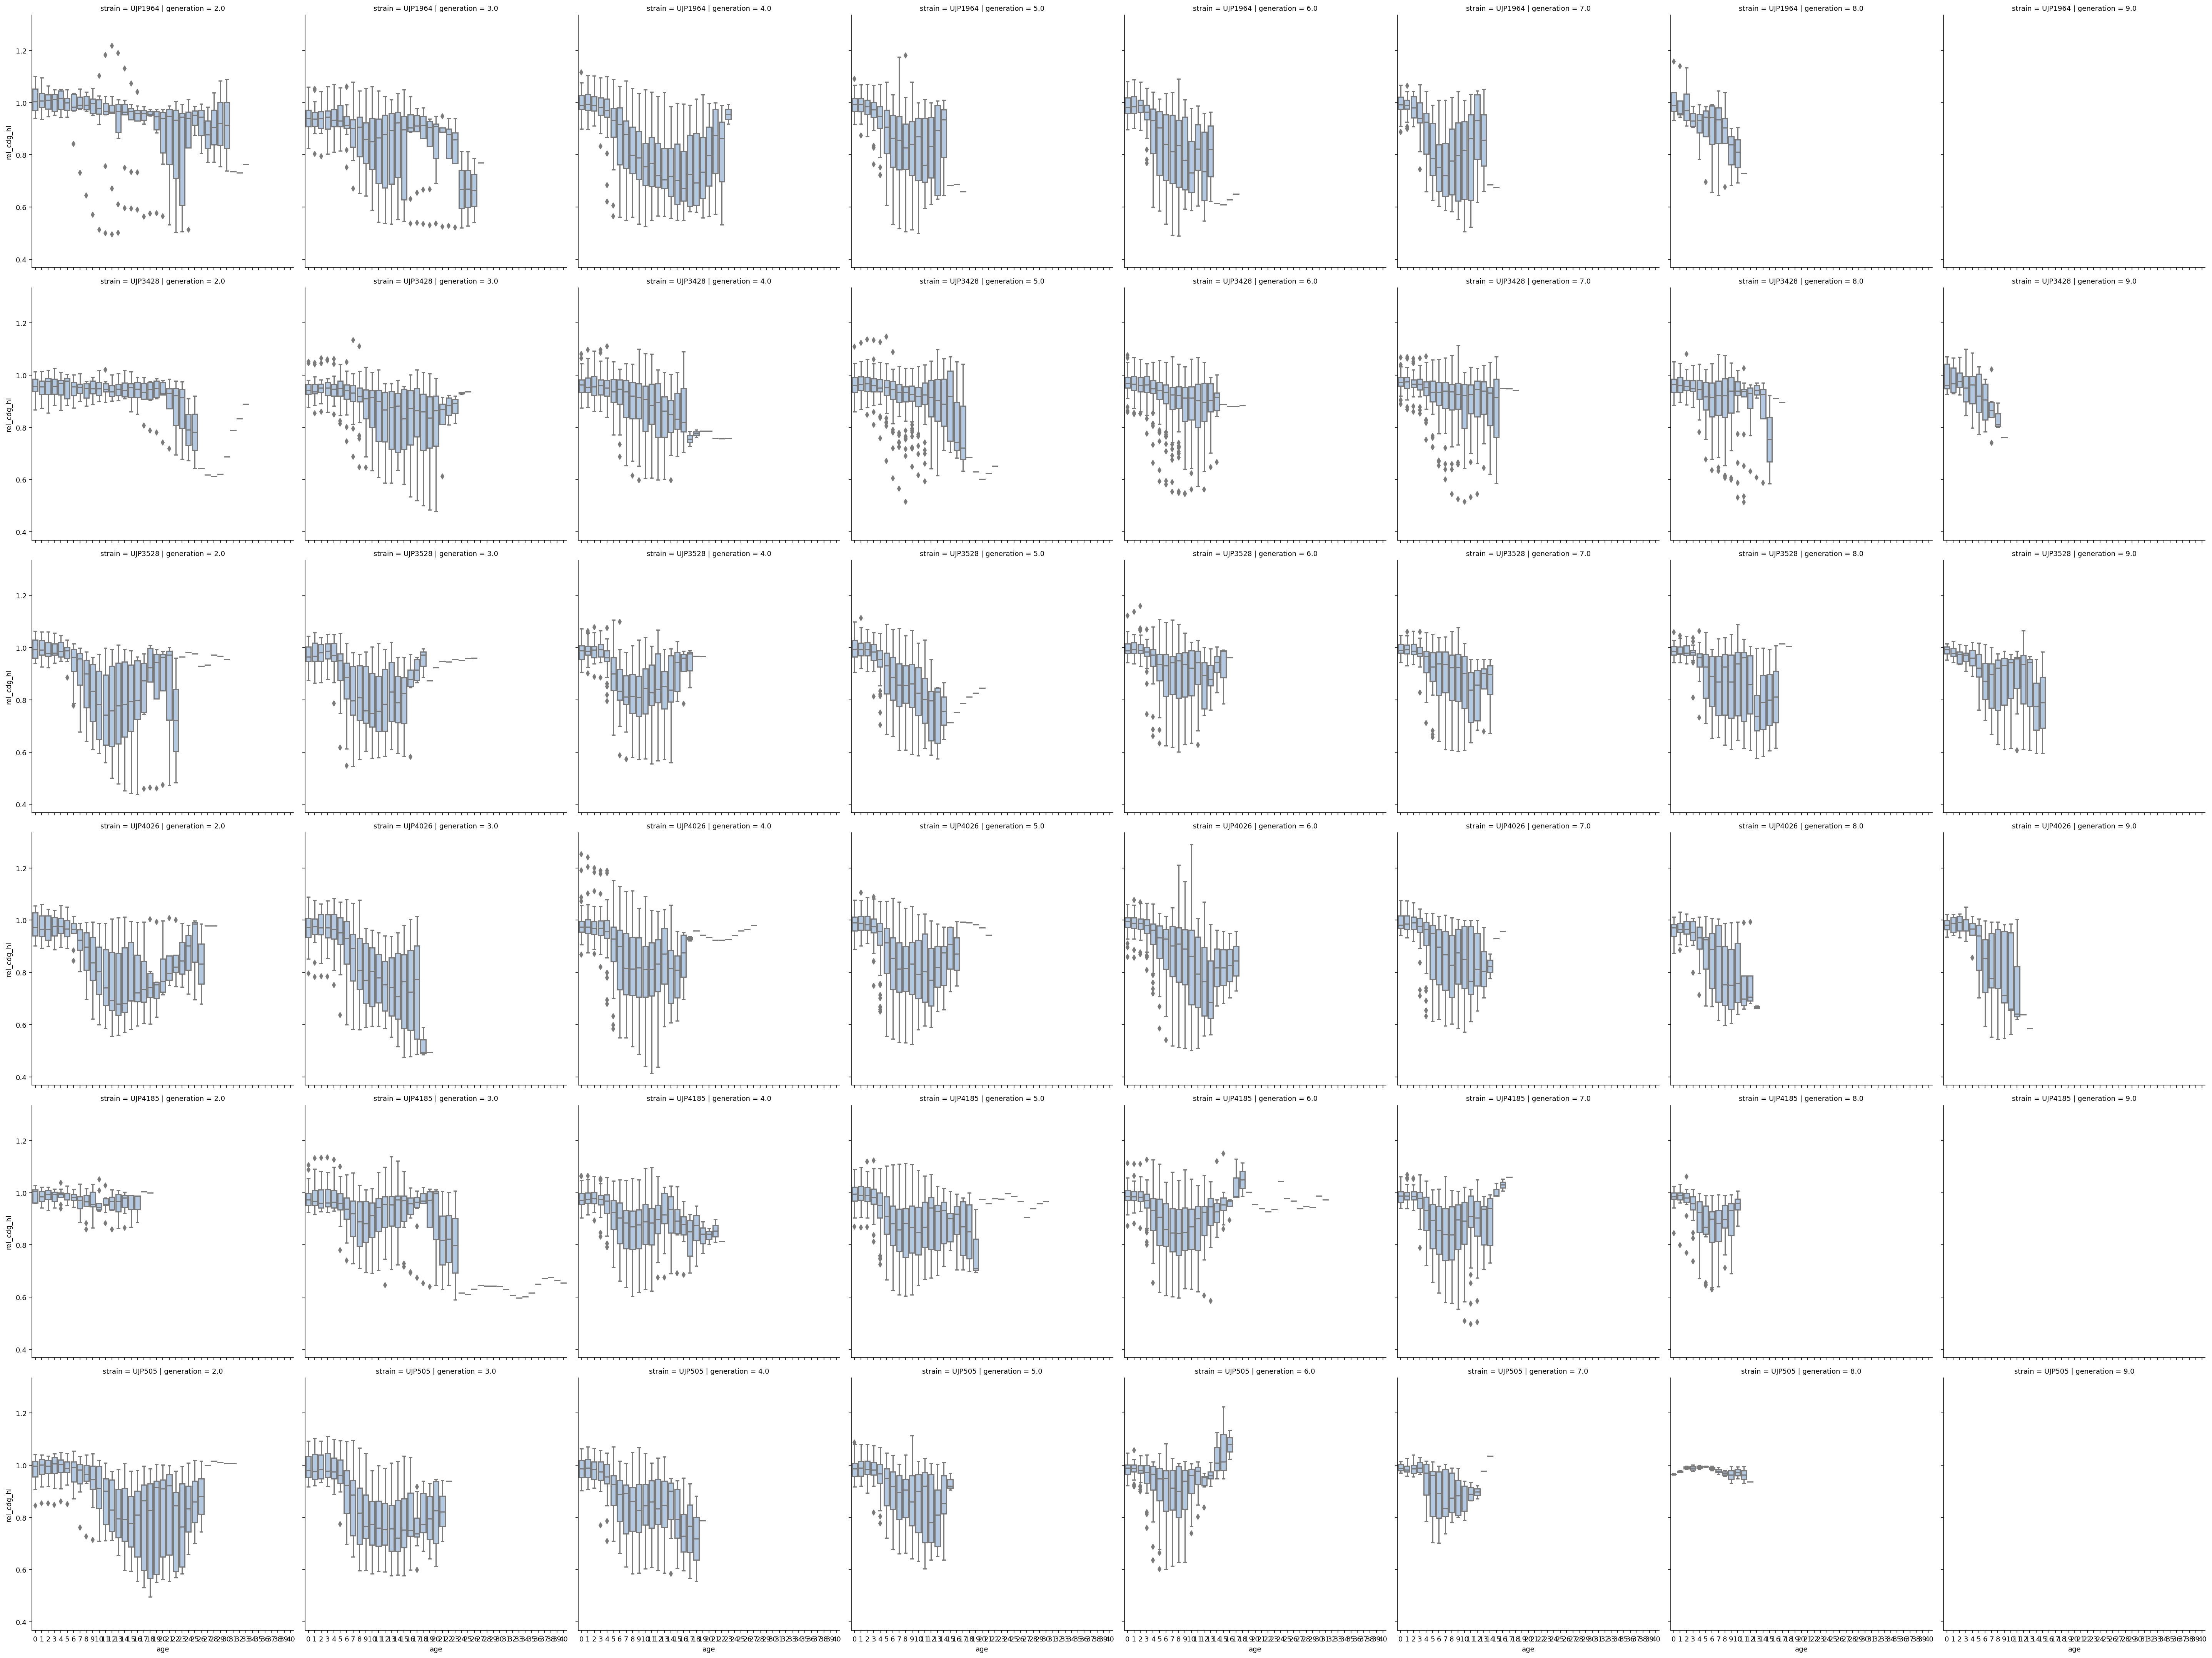

In [19]:
df_clean = df[df['generation']<10].copy()
g = sns.catplot(x="age", y='rel_cdg_hl', row="strain",
                   col='generation', data=df_clean,kind ='box',color= '#abc9ea')
#g.set(xlim=(0,18))

